# Temperature Forecast 

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


This is the dataset, we have 7752 rows(0-7751).

We have 25 columns(0-24).

Here we need make predictions on two columns : 
    
    1) Next_Tmax: Next day maximum temperature                                        

    2) Next_Tmin: Next day  minimum temperature

We can also infer that both of our target columns " Next_Tmax" and " Next_Tmin" contains continuous data and hence is a Regression problem and we need to use Regression models to perform our predictions



# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
# df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [6]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [7]:
# df.tail() displays the last 5 rows from the dataset(indexed from 7747-7751), so from here we can draw conclusion that we have total of 7752 rows(0-7751)

In [8]:
df.shape

(7752, 25)

7752 rows, 25 columns

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

df.columns displays the list of all column headings in our dataset, We have 14 columns in our dataset and their meanings wrt to Avacado is as below

1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
19. lat - Latitude (Â°): 37.456 to 37.645
    
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
    
22. Slope - Slope (Â°): 0.1 to 5.2
    
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [11]:
# from df.info() we can infer that we have 7752 row entries in total(0-7751)
# we have 25 data columns(0-24)
# Columns "lat", "lon", "DEM", "Slope", "Solar radiation", "Next_Tmax"and "Next_Tmin" has no null values, hence the non-null count is 7752 for all these columns of dataset
# Most of the columns have float as the values and hence the datatype
# The column "Date" is not identifiable hence seen as object
# We need to convert them into python identifiable type
# Date is not identified , so we need to split and extract data from it and change its datatype to identifiable type

In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
# We have null values present in all columns except for lat, lon, DEM, Slope and Solar radiation
# We need to treat them

In [14]:
np.where(pd.isnull(df)) #This is to find the location if incase null values are present in the dataset

(array([ 225,  225,  271, ..., 7750, 7751, 7751], dtype=int64),
 array([2, 3, 2, ..., 1, 0, 1], dtype=int64))

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [17]:
# We dont have null values present

In [18]:
# Trying to find the duplicate rows in our dataset

duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the training dataset
df[duplicate]               # prints the duplicate rows in the training dataset

0


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [19]:
# No duplicates present in our dataset

In [20]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [21]:
# df.describe() shows statistical data 
# It show that there are multiple outliers mostly in SolarRadiation 
# There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction
# Also, number of rows in each column are same i.e, new count is 7588, means there are no null values in the data set.
# Most of the column statistics data are near to 0 values.
# We need to treat the outliers present
# We can also see the minimum and maximum value for columns which basically provides us the range

# Data Manipulation

In [22]:
# Let's treat Date column 

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Year'] = df['Date'].apply(lambda x:x.year)


In [24]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013


Here we add three more columns year, month and day where 6 in Month implies the month "June" , 30 in Day implies the 30th day of a month and 2013 in year represents the year 2013.

Now the column count is 28 and we need to drop column "Date".

In [25]:
# So now since we have created 3 new columns, we can drop the column date

In [26]:
# Dropping column date

df.drop("Date",axis=1,inplace = True)

In [27]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,30,2017


In [28]:
# Column "Date" is successfully dropped and now the count is updated to 27

In [29]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month                 int64
Day                   int64
Year                  int64
dtype: object

In [30]:
#  Now all the column values are in either float or int datatype . None of them are in object datatype

# Uni-Variant Analysis

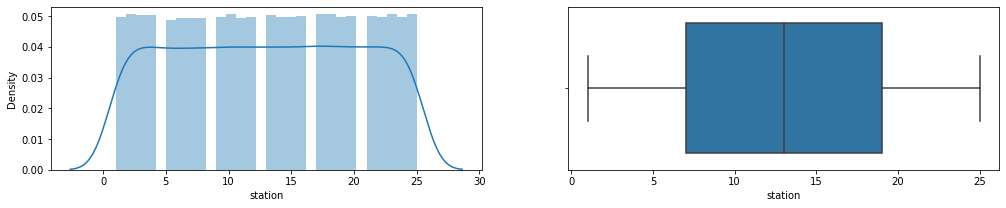

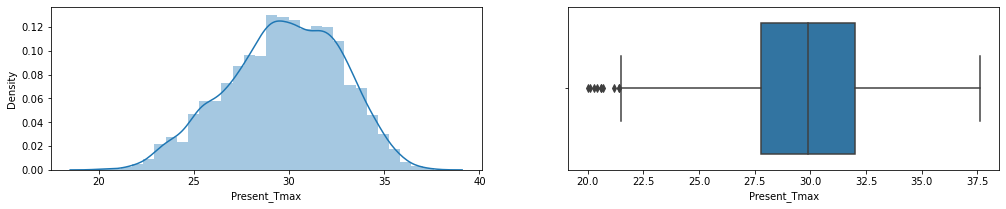

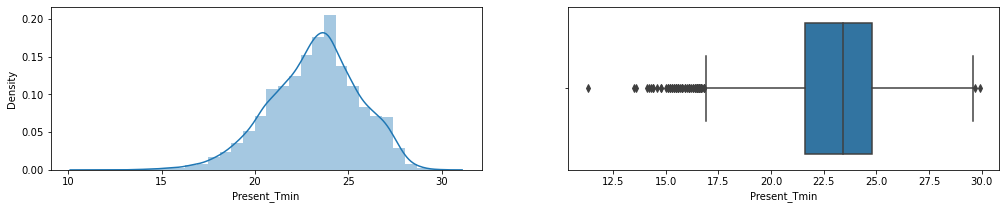

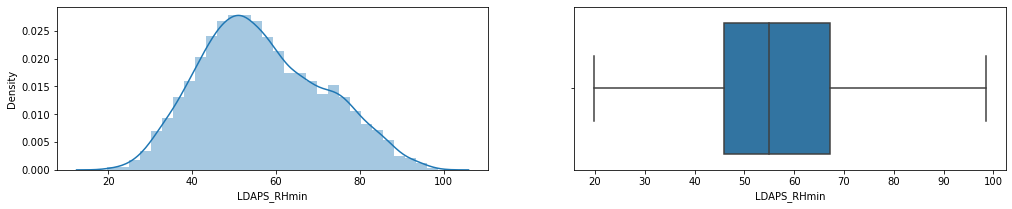

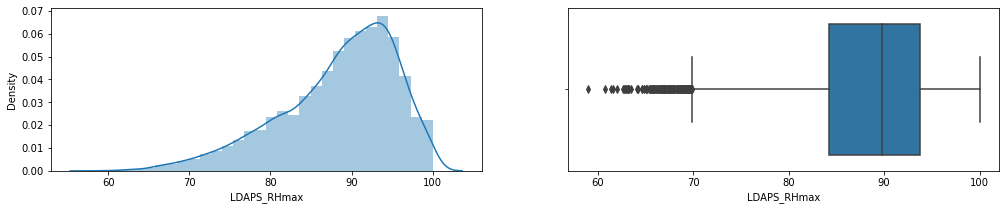

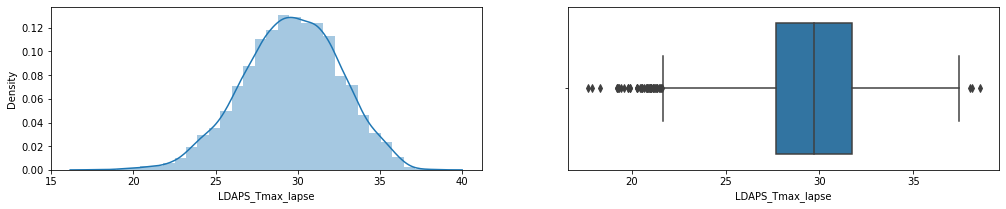

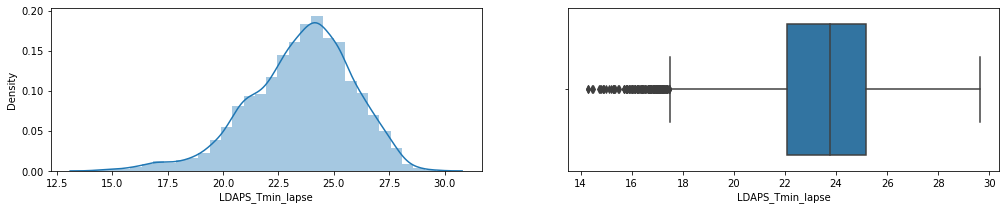

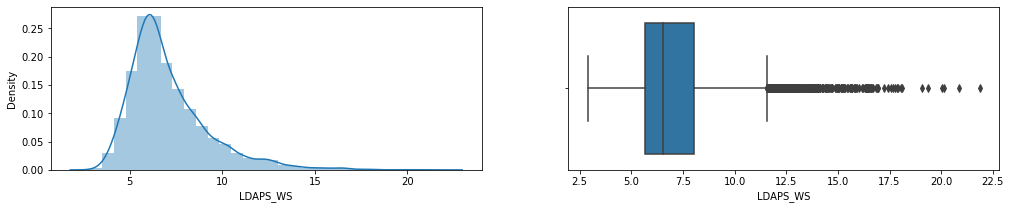

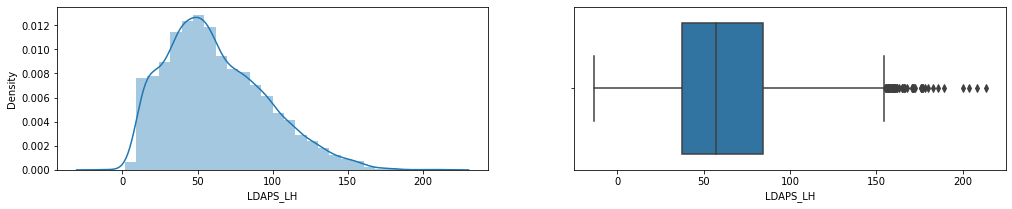

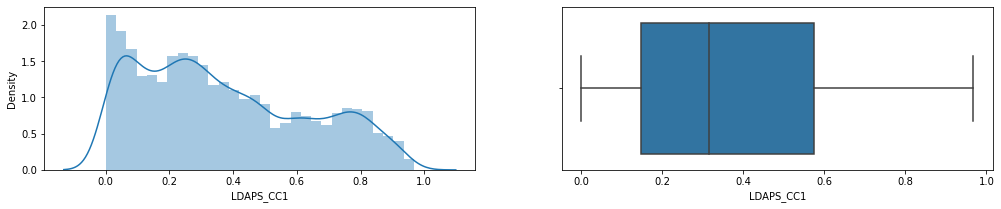

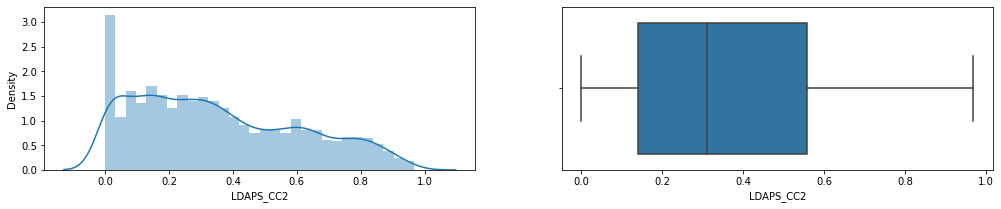

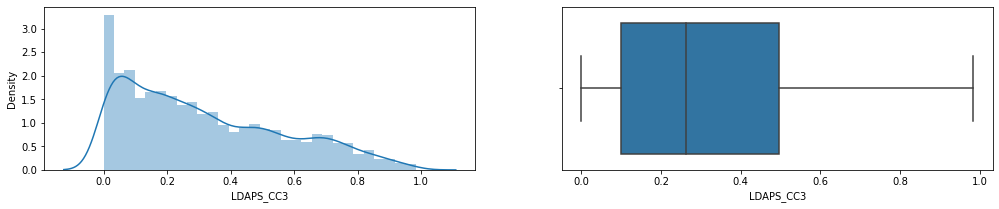

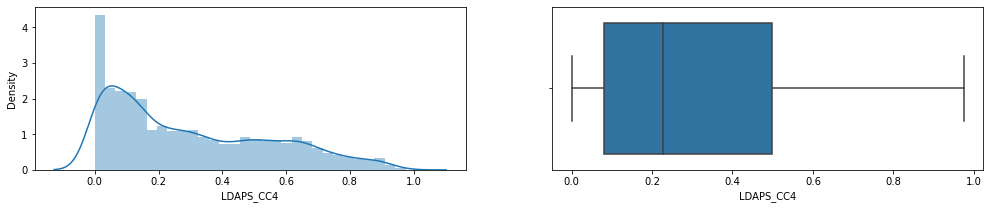

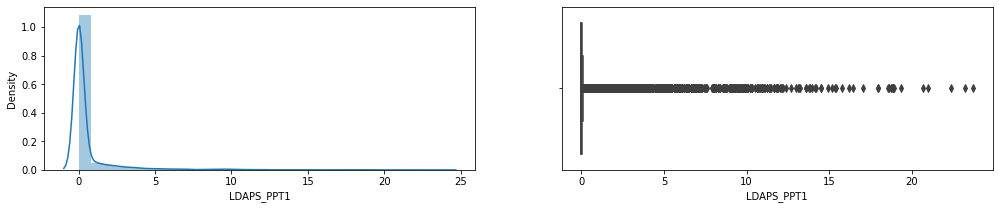

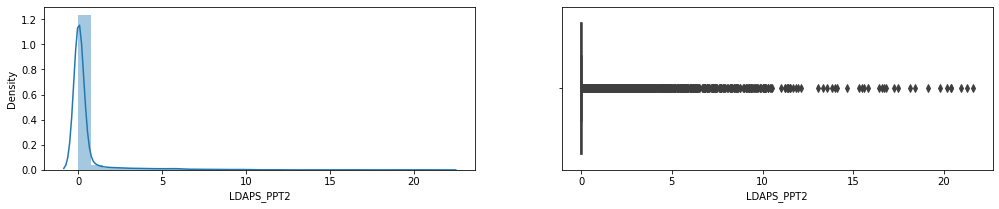

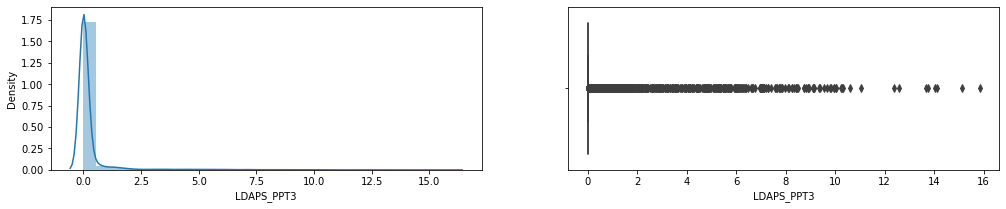

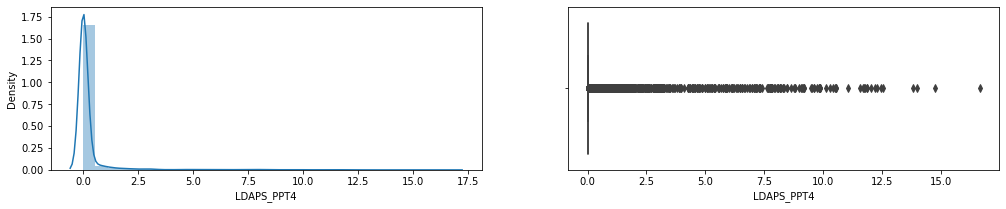

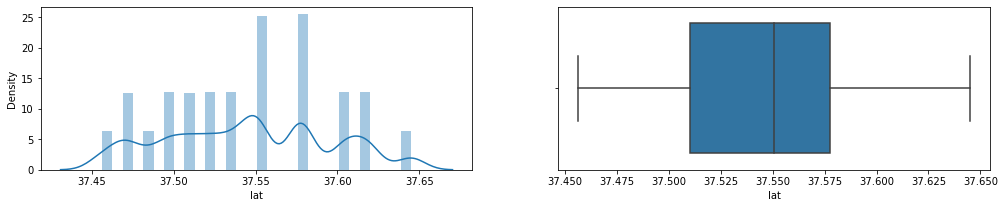

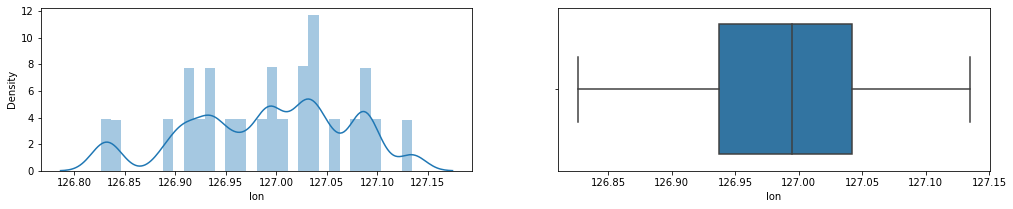

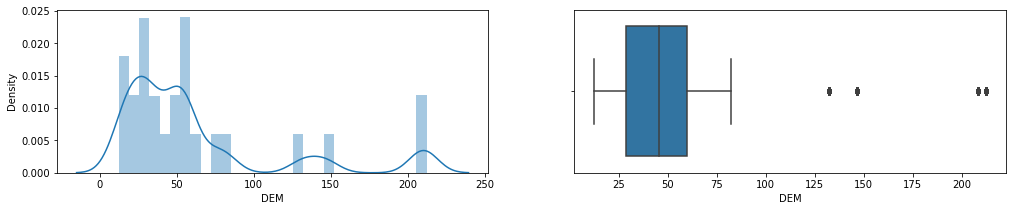

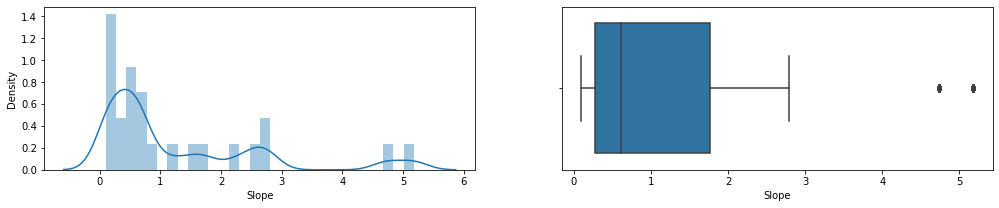

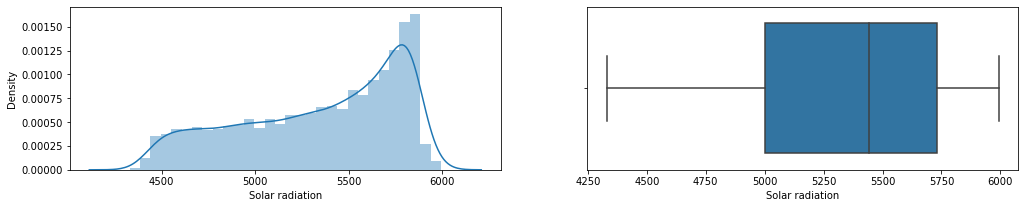

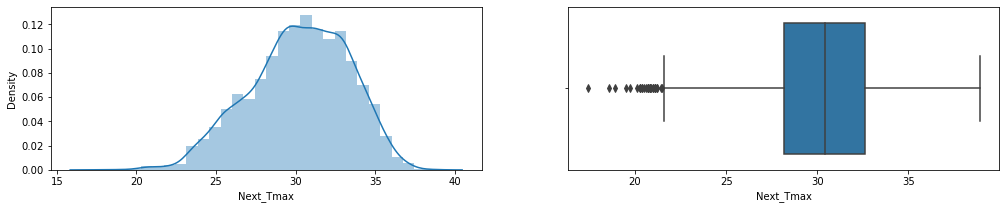

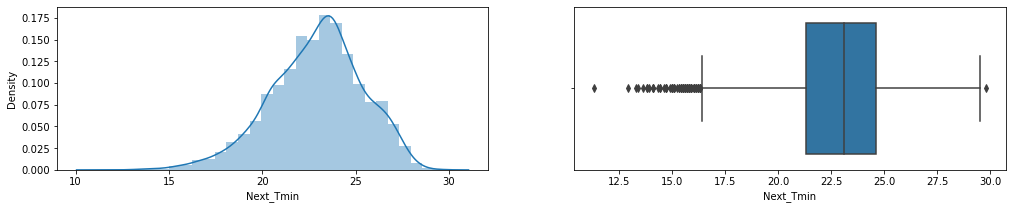

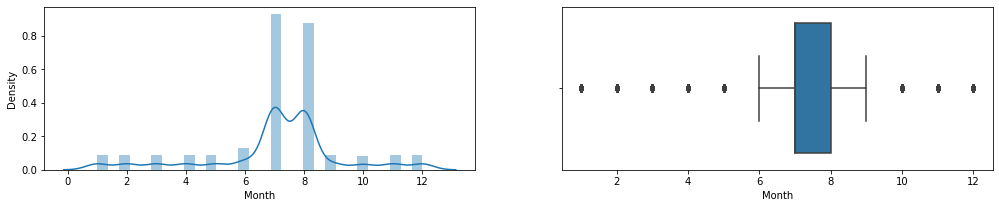

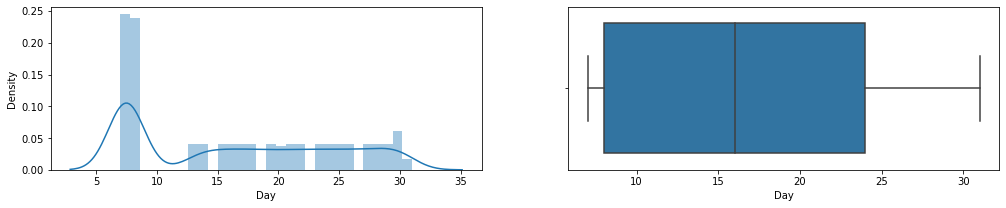

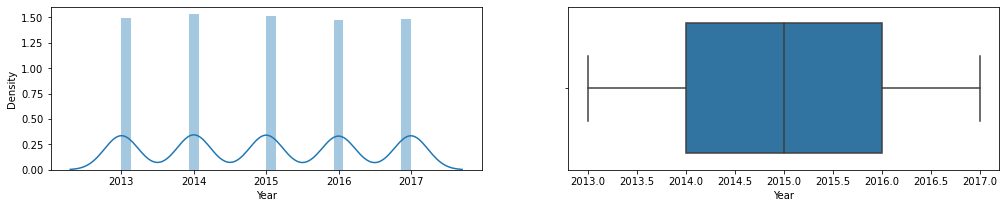

In [31]:
#Univariate analysis for num_df

skewness, skew_name = [], []
for i in df.columns:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)

The above uni-variant analysis shows the plot of distribution and also shows the presence of outliers in our dataset

The columns Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmax and Next_Tmin are almost normally distributed

From the boxplots we can clearly visualize more outliers presence for few columns and there are columns with no outliers present in them

Solar radiation, LDAPS_RHmax, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 are left skewed and few other columns are right skewed

We see the presence of outliers and skewness in our dataset which needs to be treated.

# Bi-Variant Analysis

Text(0.5, 1.0, 'Max temperature of next day')

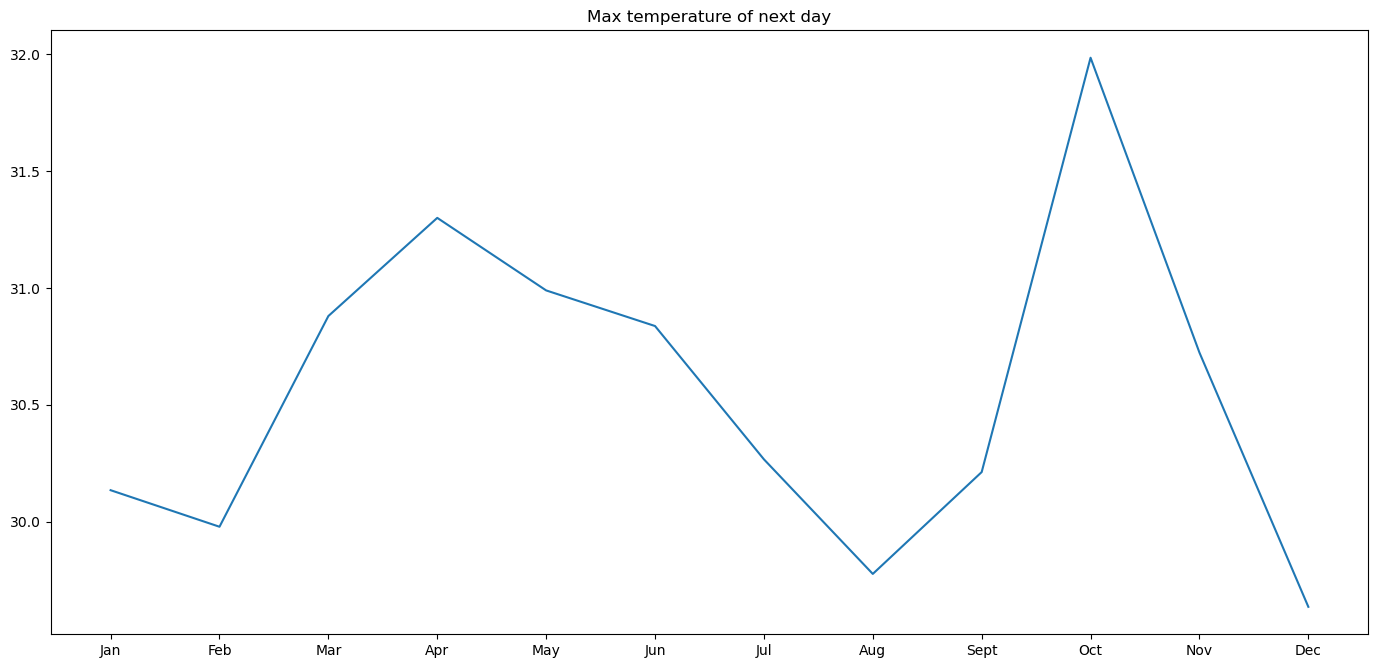

In [32]:
# Comparing the max temperature of next day with month

byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['Next_Tmax'])
plt.title('Max temperature of next day')

The analysis from here is that, the above graph plotted for Max temp of next day per month we can observe that the next day max temperature decreases from Jan to Feb and then in February to March it increases exponentially till April then it falls till August and then the month of September it witnesses a rise in the temperature exponentially till October and henceforth it starts to fall by end of December.

The least value of Max temperature of next day is in the month of December for an year

Text(0.5, 1.0, 'Max temperature of next day')

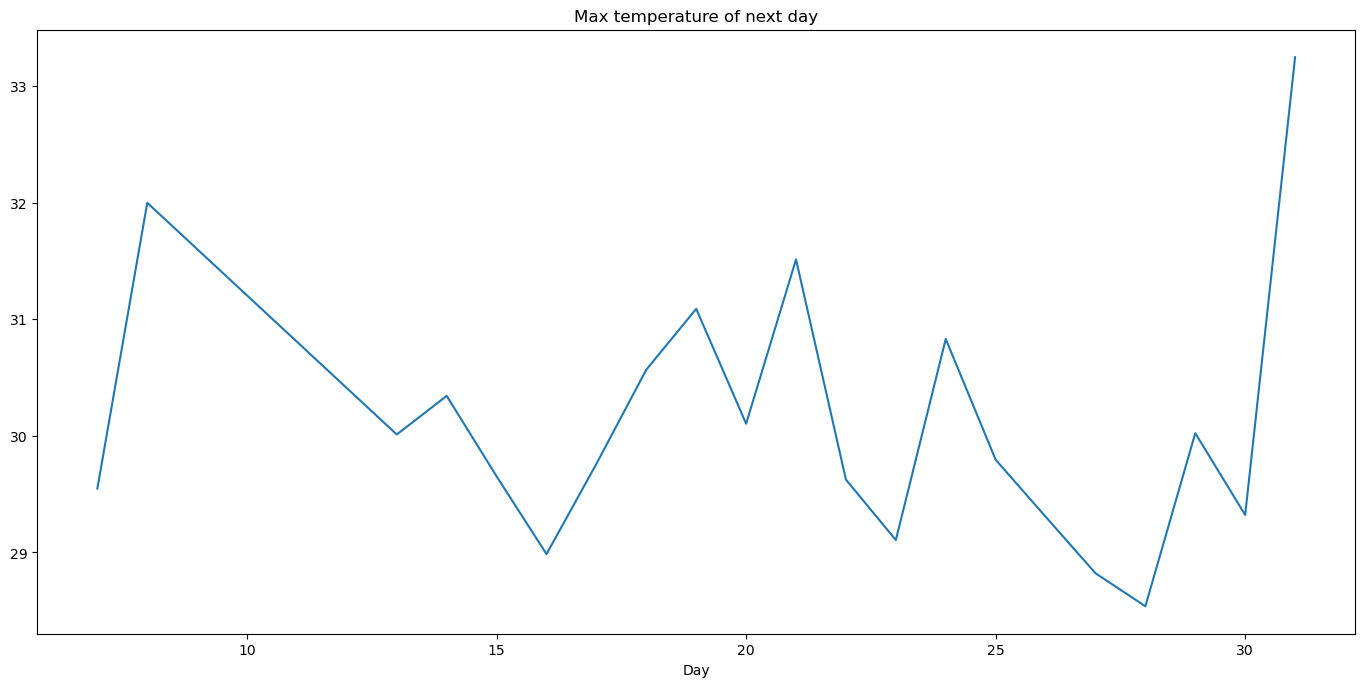

In [33]:
# Comparing the max temperature of next day with day

byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['Next_Tmax'].plot()
plt.title('Max temperature of next day')

The max temperature of next day increases to 32'C by 8th or 9th Day of a month then follows increase and decrease fashion.Towards the 30th Day of the month the maximum next day temperature goes to peak (we can see more than 33'C)




Text(0.5, 1.0, 'Max temperature of next day')

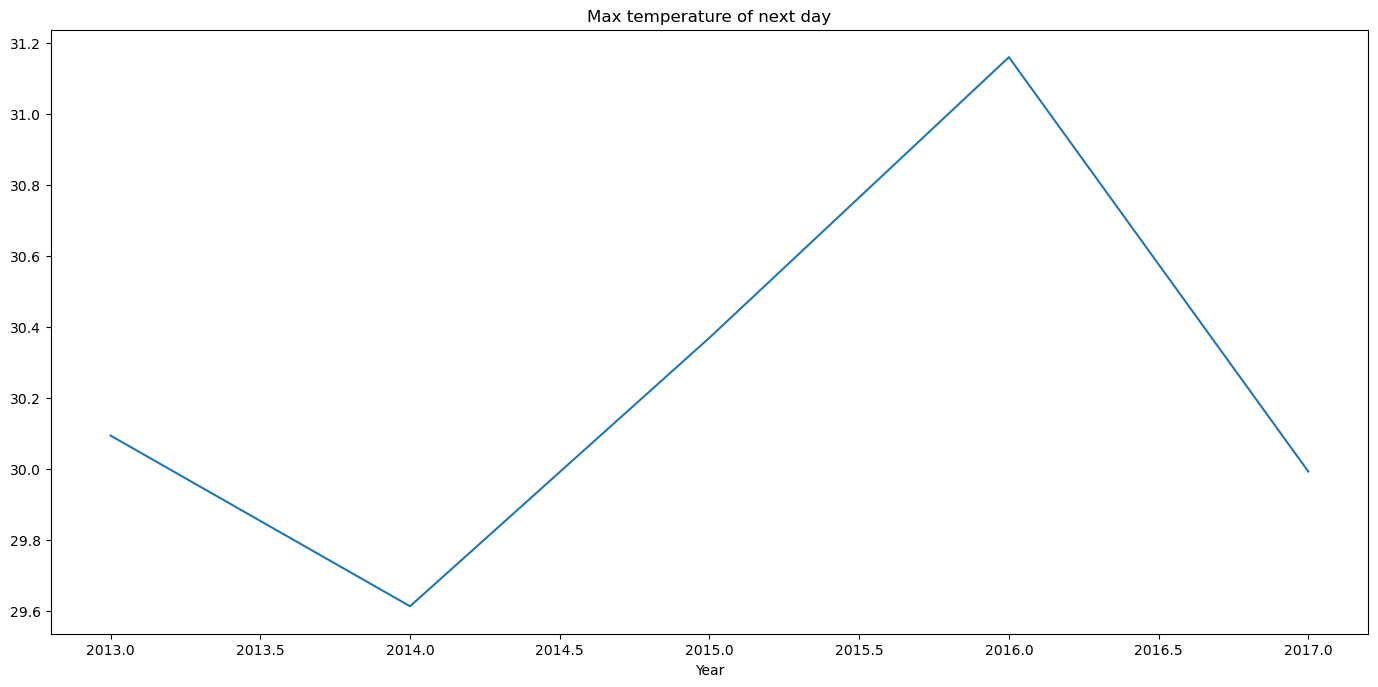

In [34]:
# Comparing the max temperature of next day with year

byYear = df.groupby("Year").mean()
plt.figure(figsize=(17,8),dpi=100)
byYear['Next_Tmax'].plot()
plt.title('Max temperature of next day')

Starting from 2013 the maximun next day temperature is nearly 30.1'C decreases to 29.6'C approx by the year 2014 and then starts increasing to reach to nearly 31.2'C in the year 2016.It again starts decreasing from there and reaches to approx 30'C by end of 2017

The lowest value of maximun next day temperature is in the year 2014 and highest in 2016

Text(0.5, 1.0, 'Min temperature of next day')

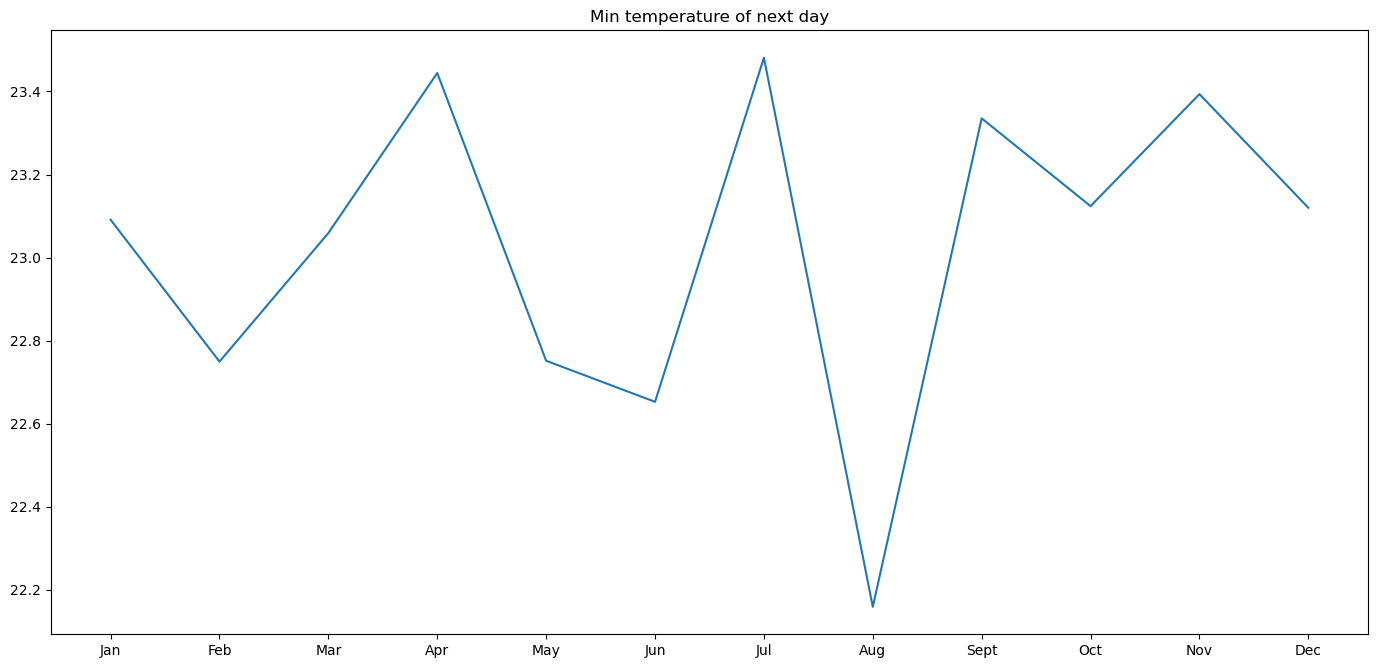

In [35]:
# Comparing the min temperature of next day with month

byMonth = df.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['Next_Tmin'])
plt.title('Min temperature of next day')

Starting from 23.1'C as min temperature of next day in the month of January decreases to nearly 22.7 by the month of Feb. 

It increases to more than 23.4'C by April and then decreases to slightly less than 22.7 again increases to more than 23.4 by July

It then exponentially decreases to reach lesser value than ever (i.e., less than 22.2'C) by August. Again increases and decreses in month of November and December

The least Min temperature of next day is in the month of August

Text(0.5, 1.0, 'Min temperature of next day')

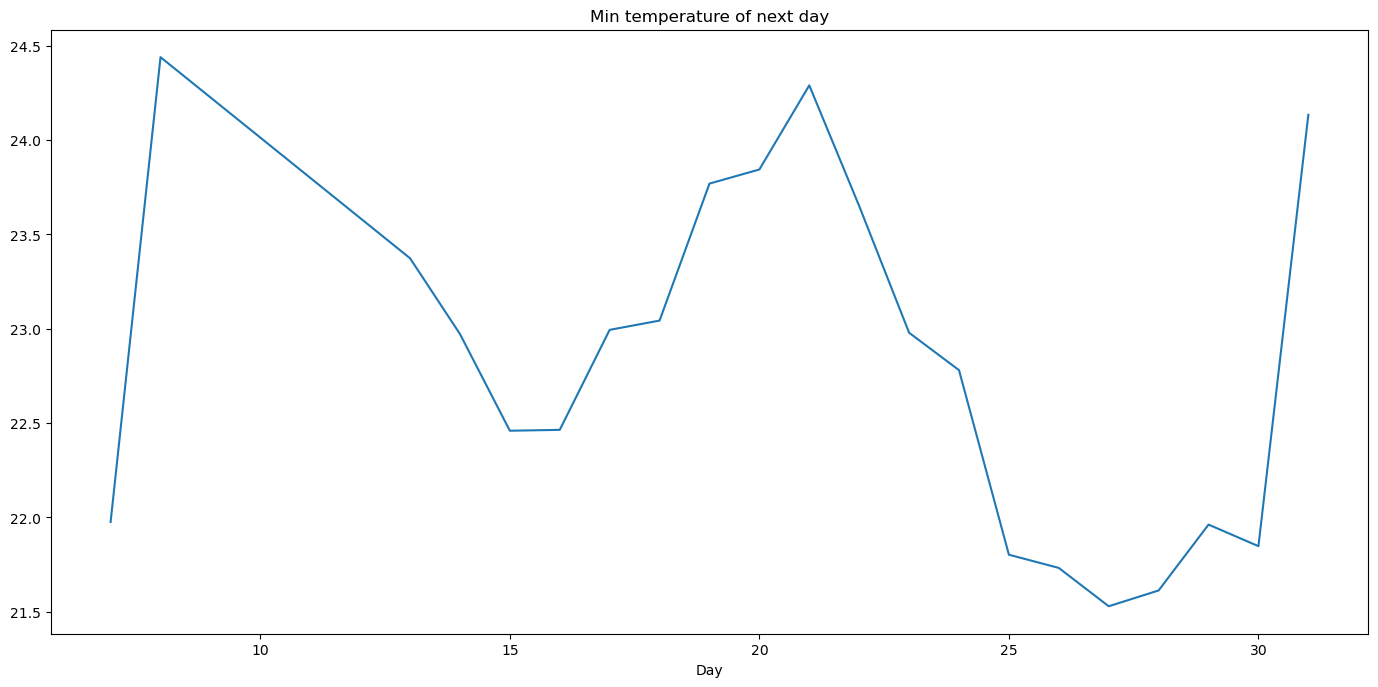

In [36]:
# Comparing the min temperature of next day with day

byDay = df.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Starting from 22'C, the minimum temperature of the next day increases exponentially and then by 11th Day of the month it starts to decrease for next 4 days remains same on that is in the steady state on 16th day of the month 

Then increases after the steady state and then will eventually starts to decrease and reaches minimum ever by 27th Day of the month

Exponential increase is seen on 30th Day of a month

Min temperature of next day has very least value by 27th Day of the month

Text(0.5, 1.0, 'Min temperature of next day')

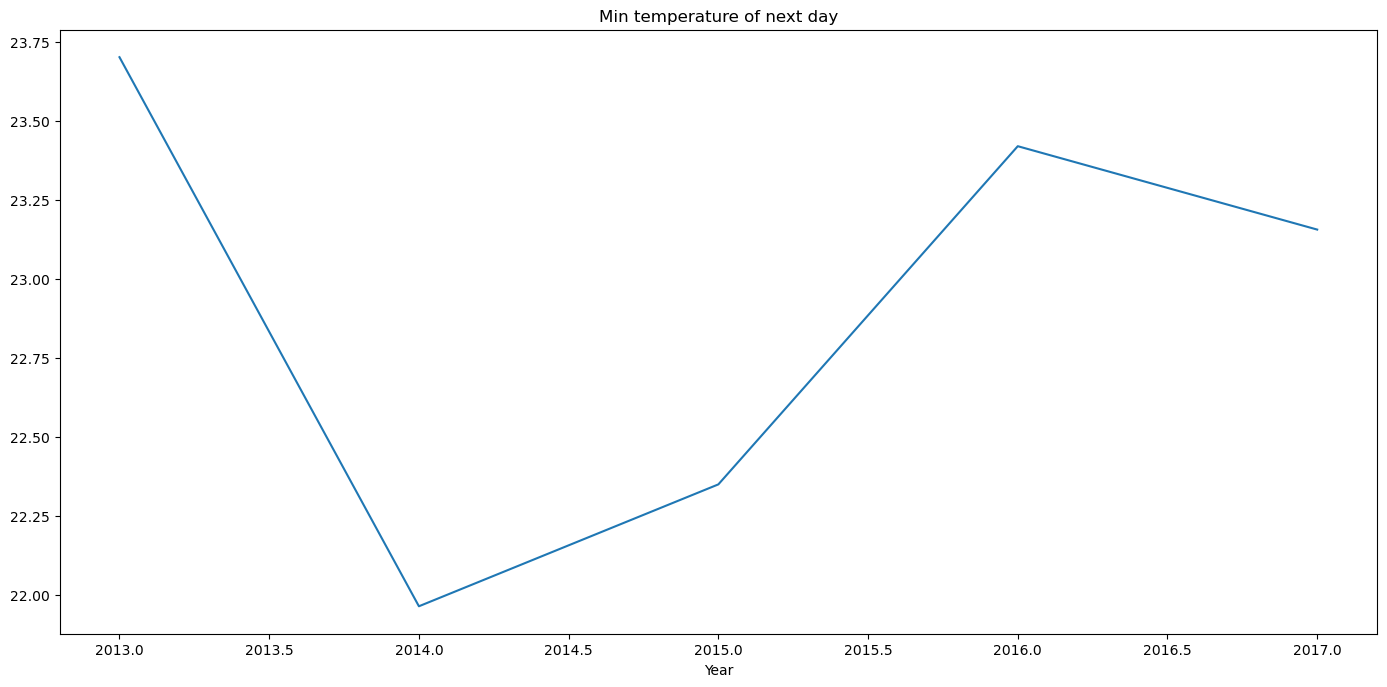

In [37]:
# Comparing the min temperature of next day with year


byYear = df.groupby("Year").mean()
plt.figure(figsize=(17,8),dpi=100)
byYear['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Starting from nearly 23.75 in 2013, the minimum temperature of the next day decreases to below 22'C in 2014 starts increasing eventually to reach more than 23.25'C in the year 2016, then we see a decrease

Min temperature of next day is in the year 2014 incomparision with all other years

Text(0.5, 1.0, 'Max temperature of next day')

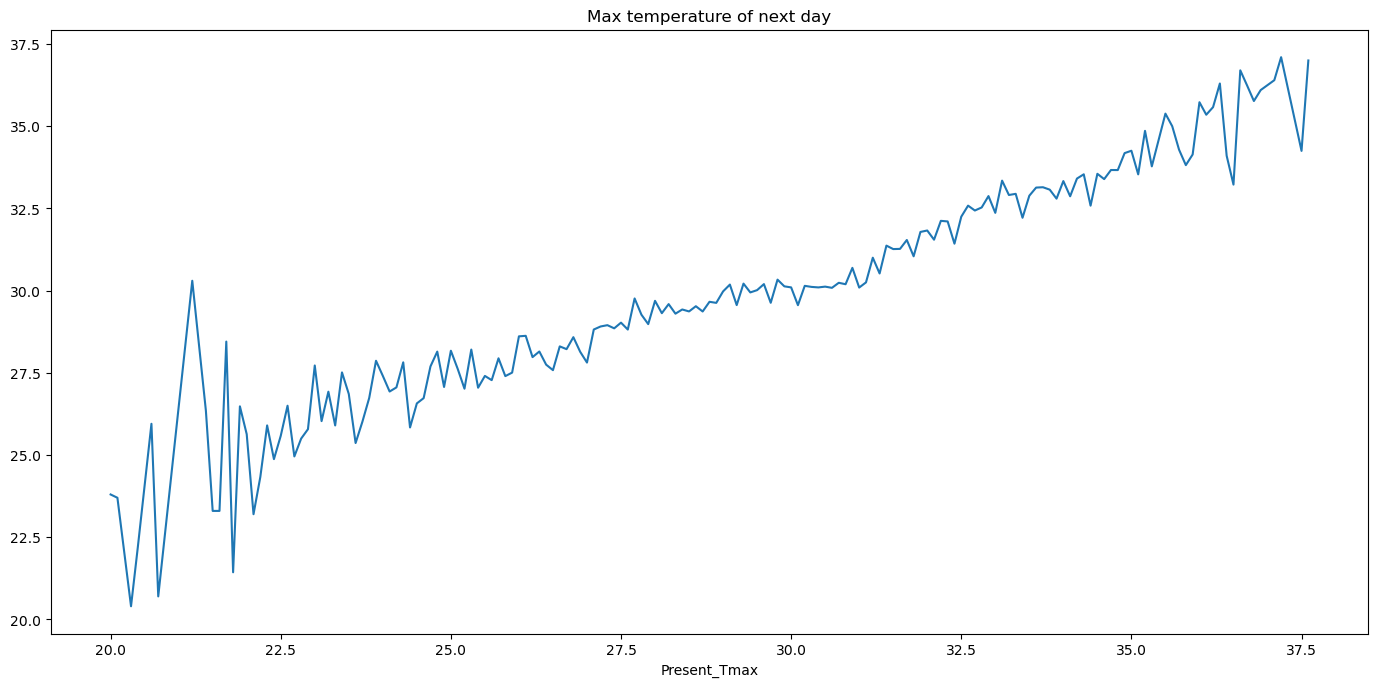

In [38]:
# # Comparing the max temperature of next day with max temperature of present day


byPresent_Tmax = df.groupby("Present_Tmax").mean()
plt.figure(figsize=(17,8),dpi=100)
byPresent_Tmax['Next_Tmax'].plot()
plt.title('Max temperature of next day')

For temperature values from 20'C to 22.4'C we have differnces between present day and next day maximum temperature and later to that we have less diff btw present and next day max temperature

Text(0.5, 1.0, 'Min temperature of next day')

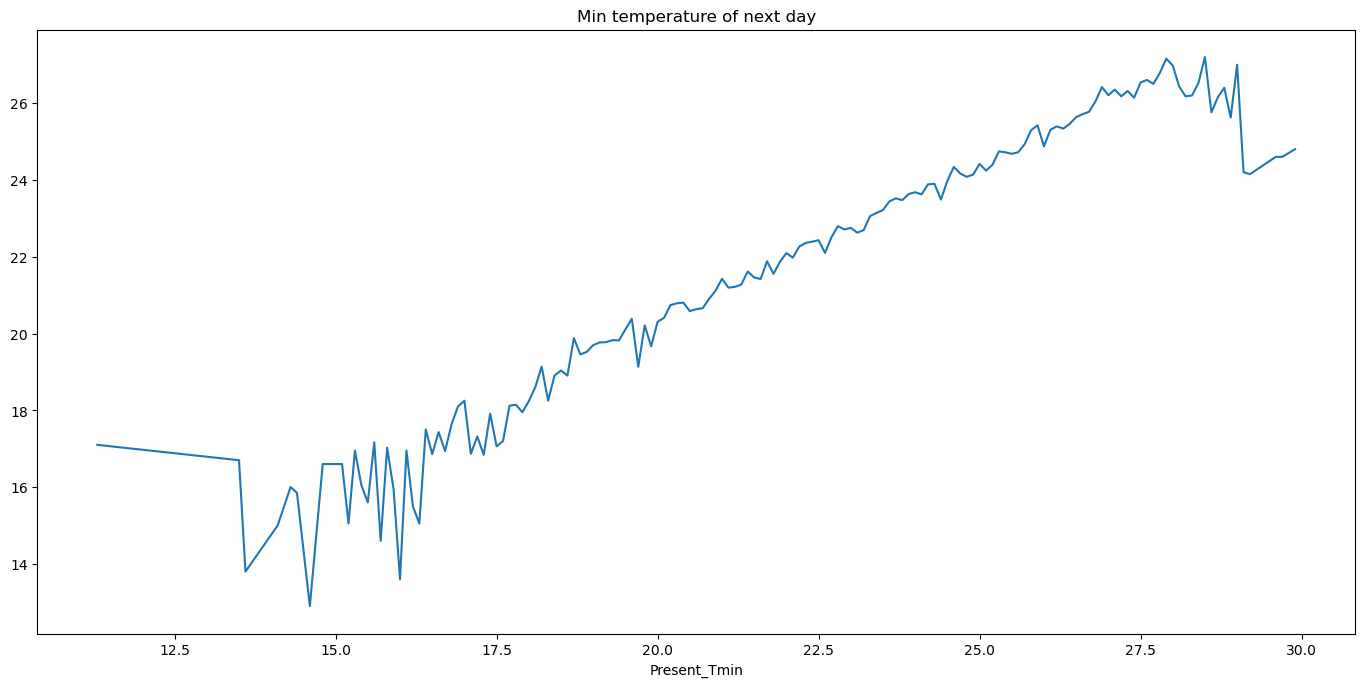

In [39]:
# Comparing the min temperature of next day with min temperature of present day

byPresent_Tmin = df.groupby("Present_Tmin").mean()
plt.figure(figsize=(17,8),dpi=100)
byPresent_Tmin['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Min temperature also follows the same fashion as that of max temperature . In the start of the graph the differnce between these two variables is high and then the difference is very minimum (almost same values for both min present and min next day temp values)

Text(0.5, 1.0, 'Max temperature of next day')

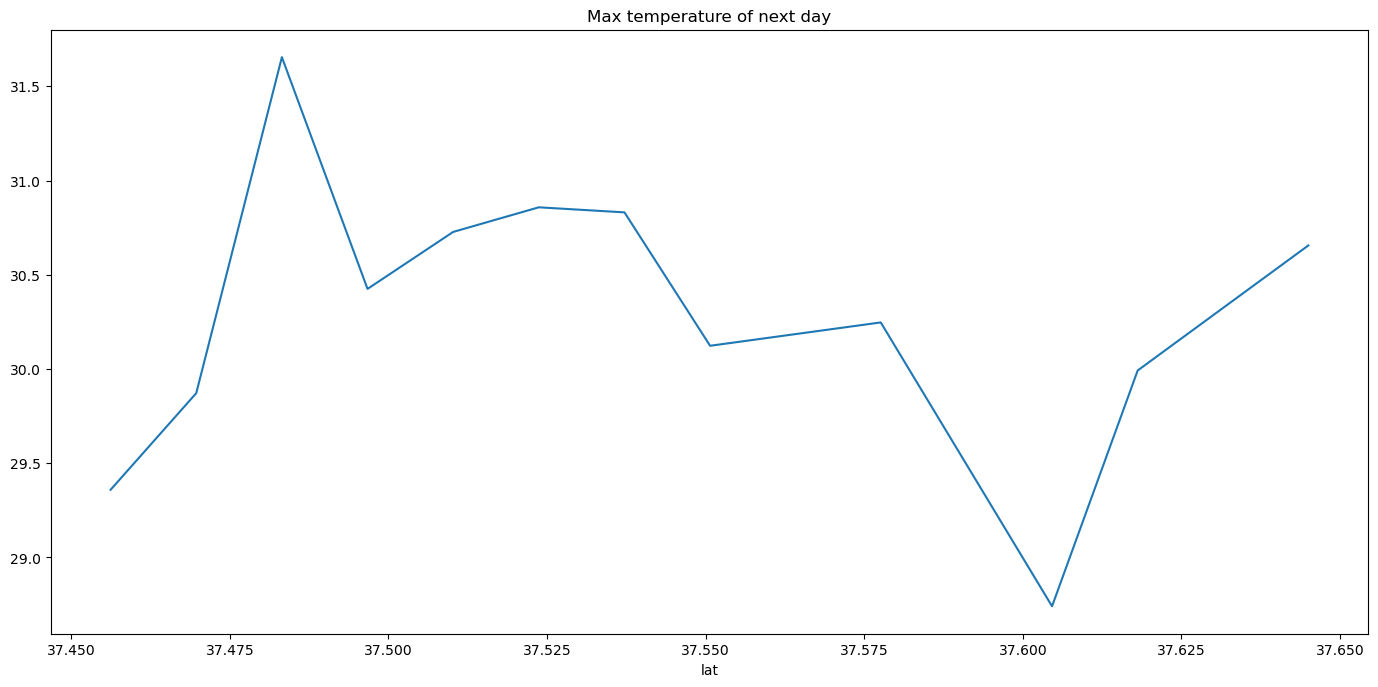

In [40]:
# Comparing the max temperature of next day with latitude 

bylat = df.groupby("lat").mean()
plt.figure(figsize=(17,8),dpi=100)
bylat['Next_Tmax'].plot()
plt.title('Max temperature of next day')

At latitude 37.450 the max temperature value for next day increases with increase in latitude value 

the max temperature value for next day starts to decrease from then and reaches the lowest value of below 29'C at latitude value nearby to 37.6 degree and
it then increases with increase in the latitude value.

Text(0.5, 1.0, 'Min temperature of next day')

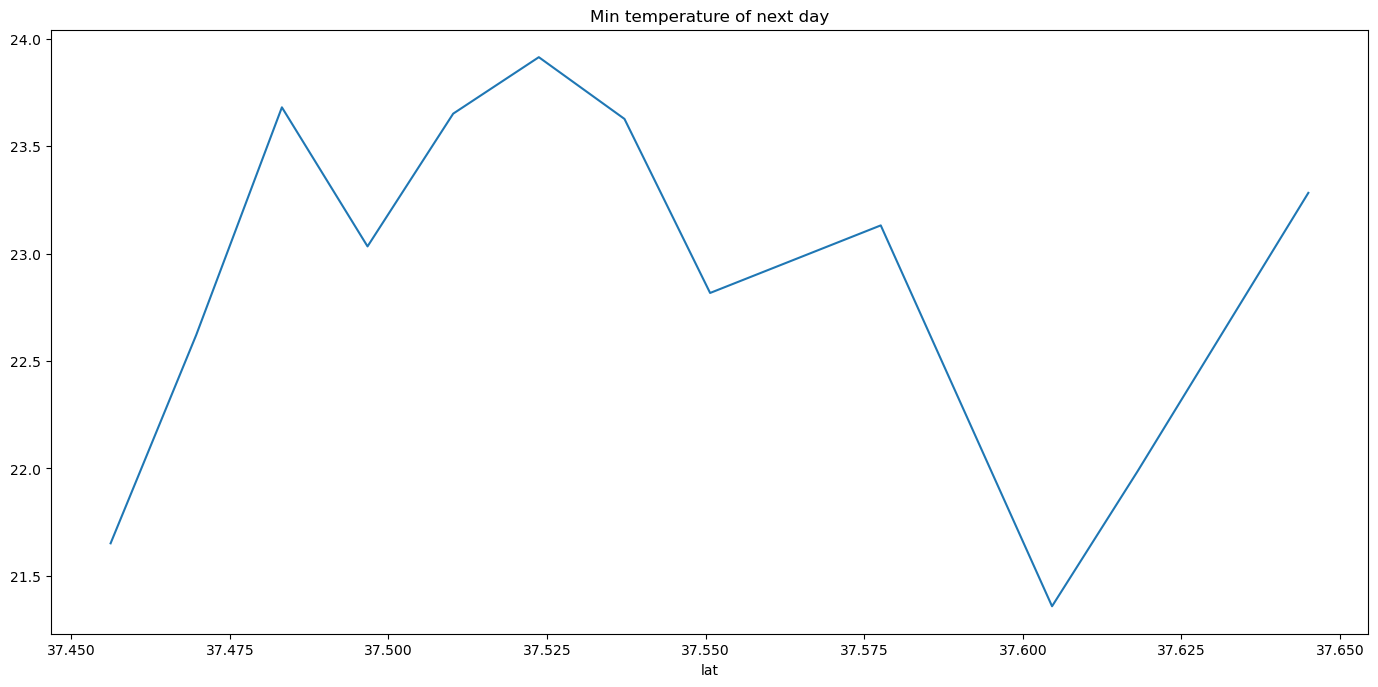

In [41]:
# Comparing the min temperature of next day with latitude 

bylat = df.groupby("lat").mean()
plt.figure(figsize=(17,8),dpi=100)
bylat['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Minimum temperature value of next day also follows the same trend as that of max with latitude values

At latitude 37.450 the min temperature value for next day increases with increase in latitude value

the min temperature value for next day starts to decrease and increase from then and reaches the lowest value of below 21.5'C at latitude value nearby to 37.6 degree and it then increases with increase in the latitude value.

Text(0.5, 1.0, 'Max temperature of next day')

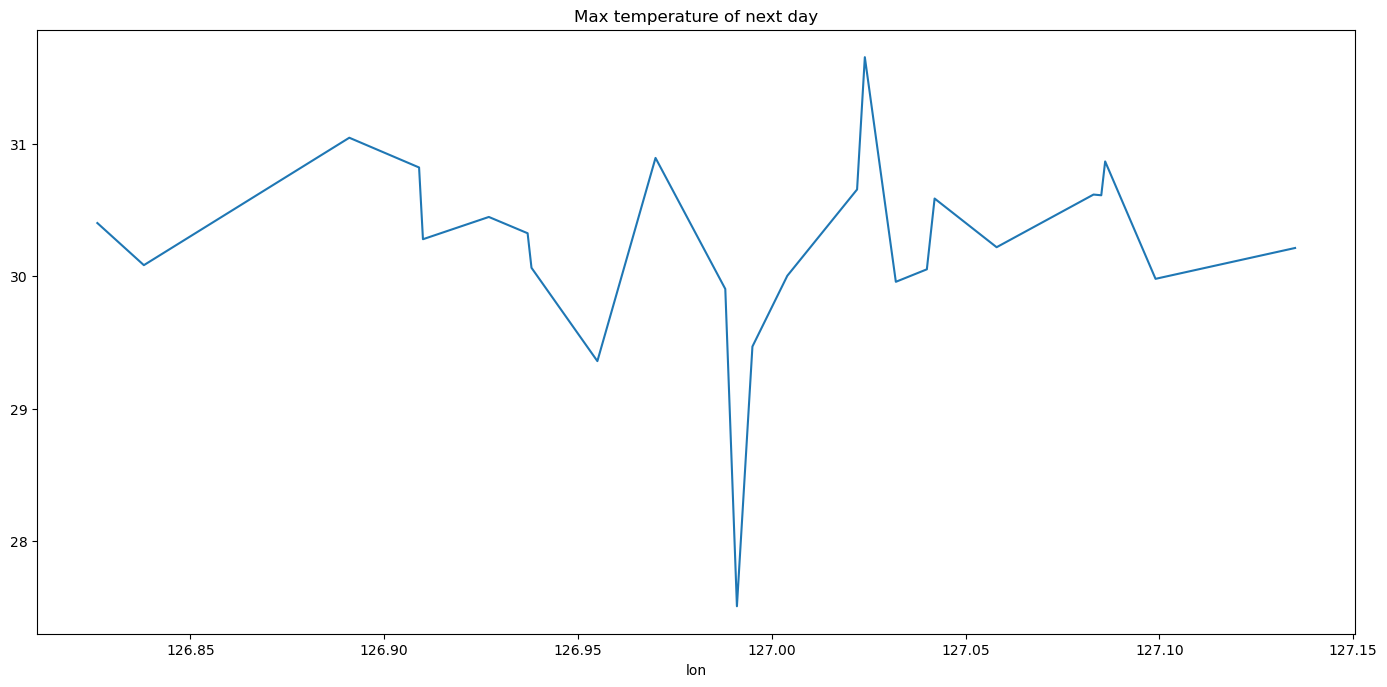

In [42]:
# Comparing the max temperature of next day with longitude 

bylon = df.groupby("lon").mean()
plt.figure(figsize=(17,8),dpi=100)
bylon['Next_Tmax'].plot()
plt.title('Max temperature of next day')

At follows increase and decrease trend but no much exponential diff

At the longitude value nearby 127 degrees the max temperature of next day is min ever that is its below 28'C . At other longitude values most of the temperature are in 30s range

Text(0.5, 1.0, 'Min temperature of next day')

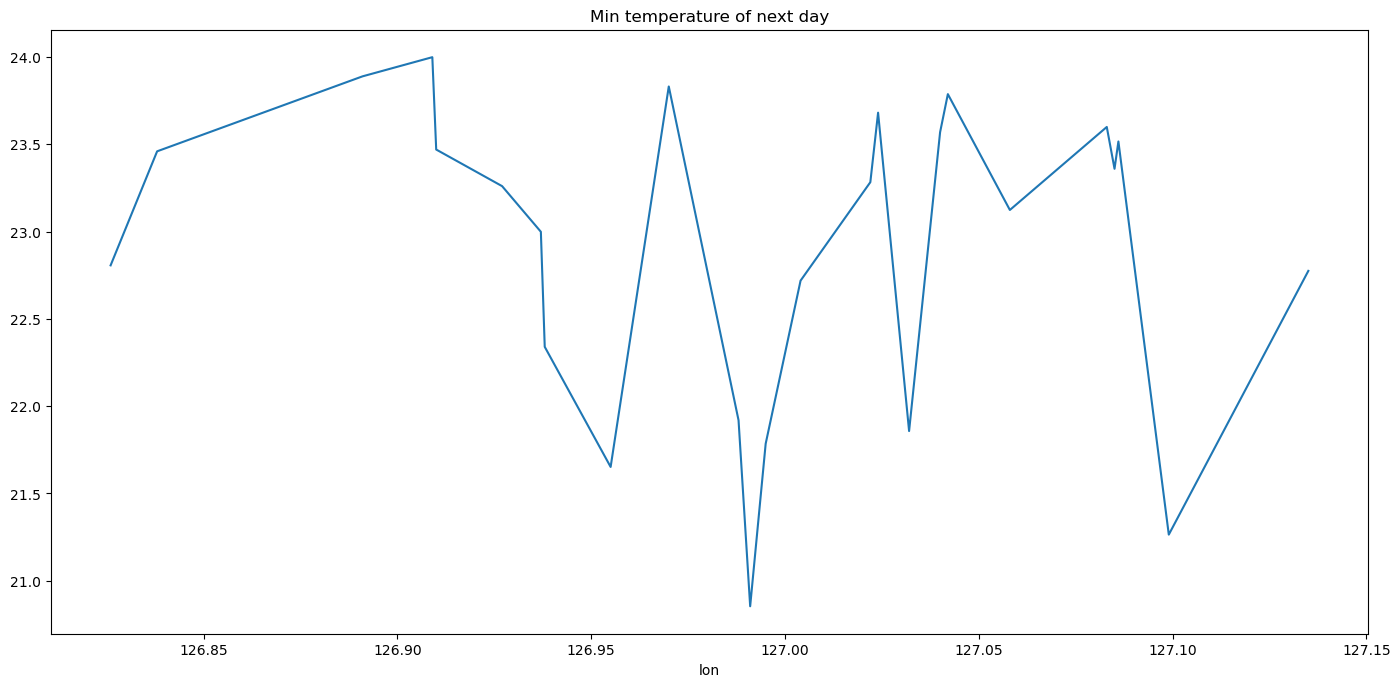

In [43]:
# Comparing the min temperature of next day with longitude 

bylon = df.groupby("lon").mean()
plt.figure(figsize=(17,8),dpi=100)
bylon['Next_Tmin'].plot()
plt.title('Min temperature of next day')

It follows up down increase and decrease trend with the longitude values

The min temperature of next day is below 21'C for the longitude value nearby 127 degrees

Text(0.5, 1.0, 'Max temperature of next day')

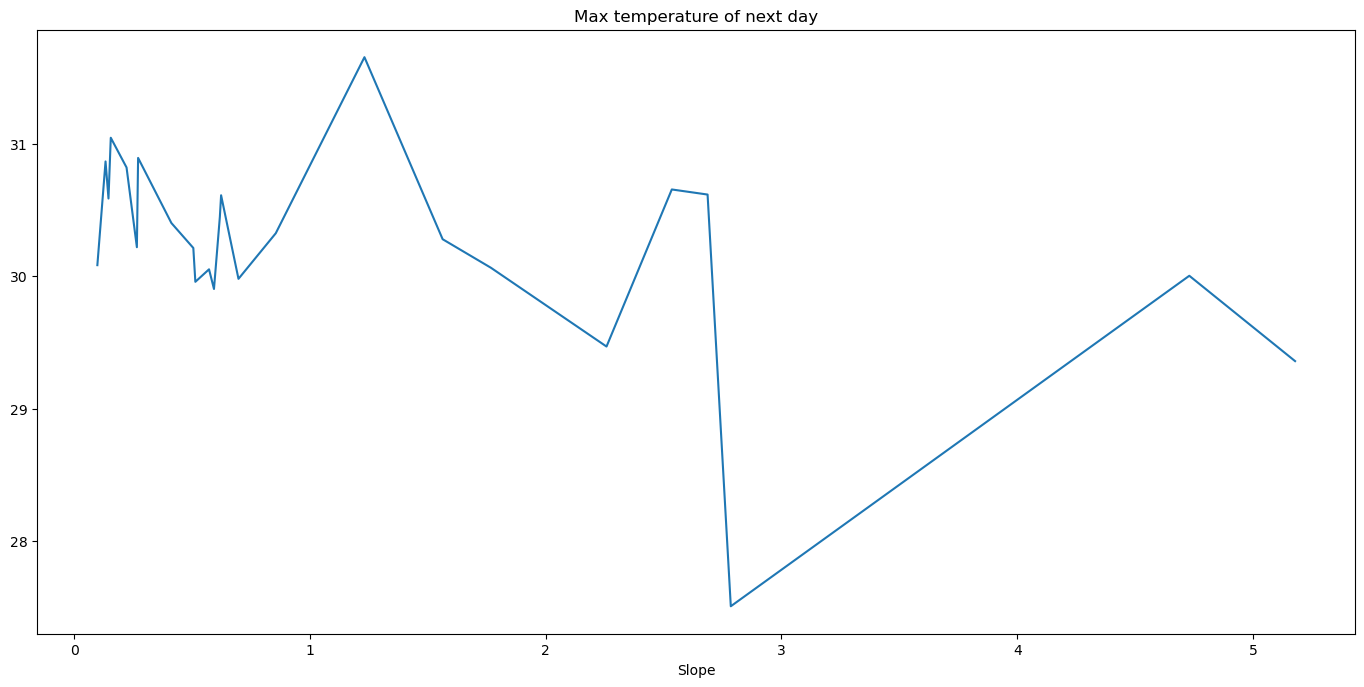

In [44]:
# Comparing the max temperature of next day with slope

bySlope = df.groupby("Slope").mean()
plt.figure(figsize=(17,8),dpi=100)
bySlope['Next_Tmax'].plot()
plt.title('Max temperature of next day')

At slope value nearing 3 the max temperature of nest day is minimum, then starts to increase with increase in slope again starts to decrease at slope value 5

Text(0.5, 1.0, 'Min temperature of next day')

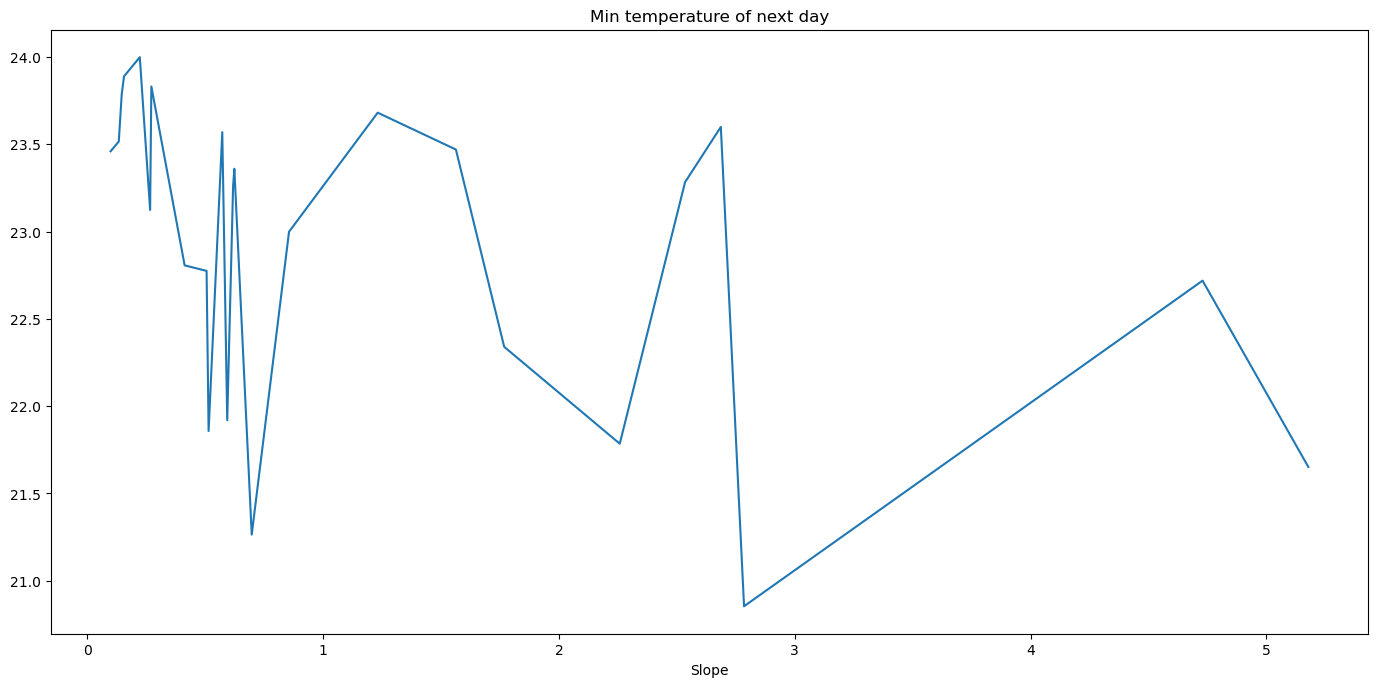

In [45]:
# Comparing the min temperature of next day with Slope

bySlope = df.groupby("Slope").mean()
plt.figure(figsize=(17,8),dpi=100)
bySlope['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Similar trend is followed here as that of max temp v/s slope graph

At slope value nearing 3 the max temperature of nest day is minimum, then starts to increase with increase in slope again starts to decrease at slope value 5

Text(0.5, 1.0, 'Max temperature of next day')

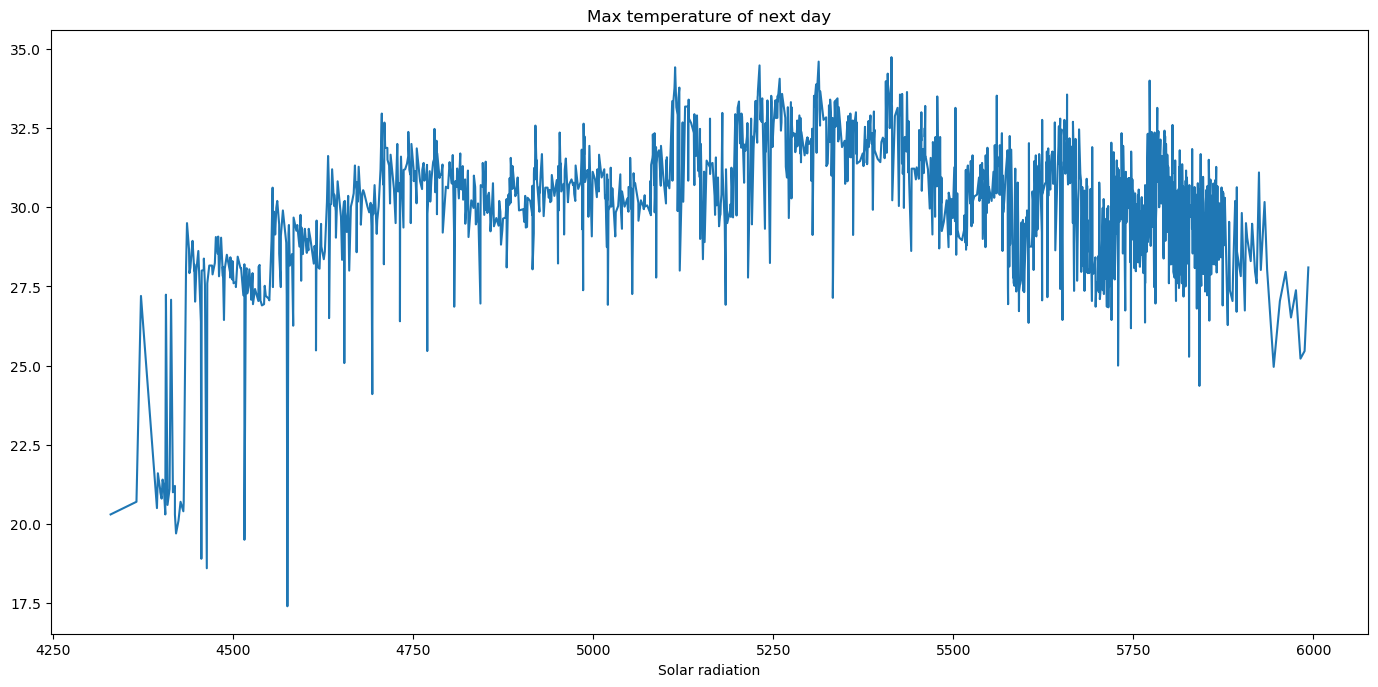

In [46]:
# Comparing the max temperature of next day with Solar radiation

bySolarradiation = df.groupby("Solar radiation").mean()
plt.figure(figsize=(17,8),dpi=100)
bySolarradiation['Next_Tmax'].plot()
plt.title('Max temperature of next day')

Text(0.5, 1.0, 'Min temperature of next day')

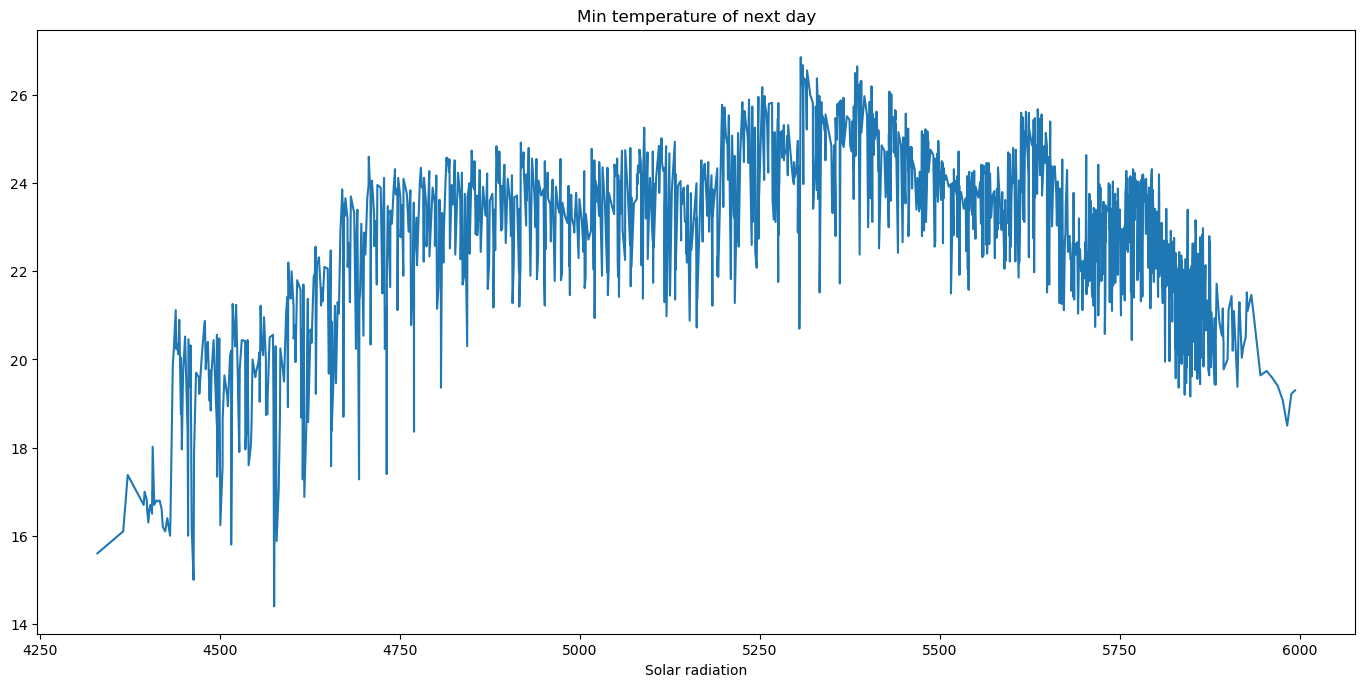

In [47]:
# Comparing the min temperature of next day with Solar radiation

bySolarradiation = df.groupby("Solar radiation").mean()
plt.figure(figsize=(17,8),dpi=100)
bySolarradiation['Next_Tmin'].plot()
plt.title('Min temperature of next day')

Text(0.5, 1.0, 'Max temperature of next day')

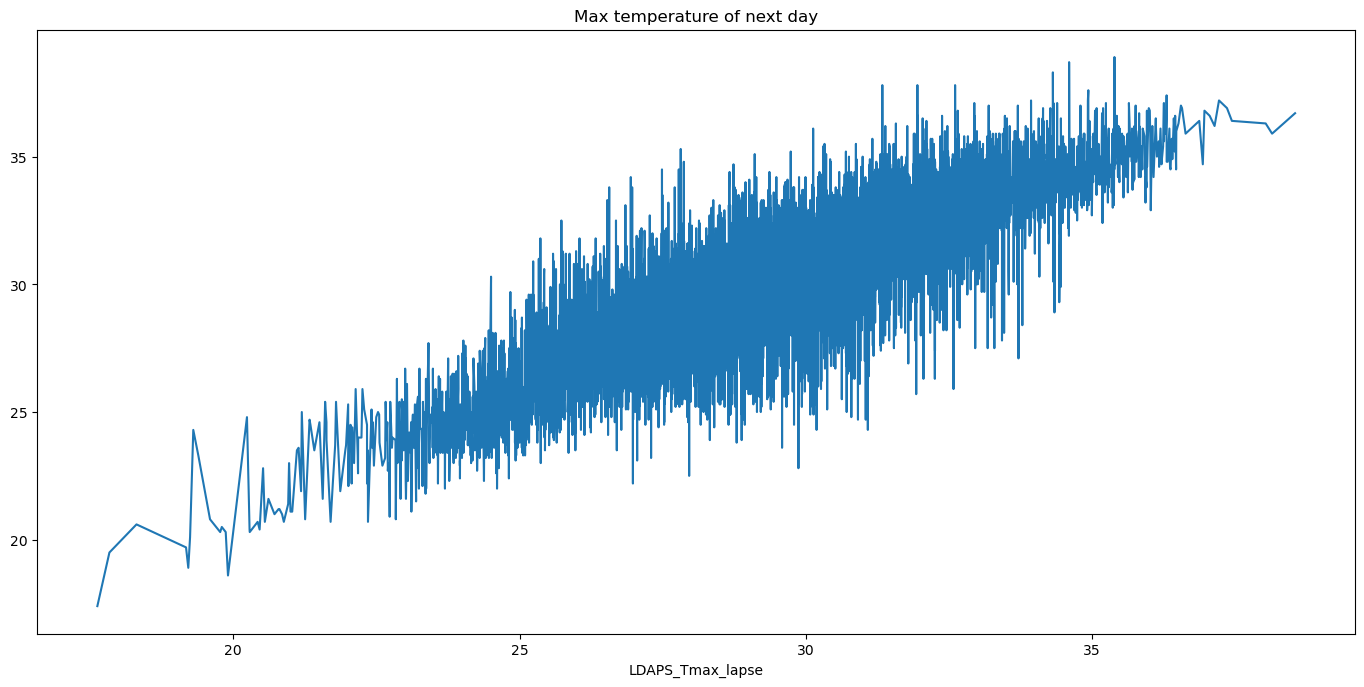

In [48]:
# Comparing the max temperature of next day with LDAPS_Tmax_lapse 

byLDAPS_Tmax_lapse = df.groupby("LDAPS_Tmax_lapse").mean()
plt.figure(figsize=(17,8),dpi=100)
byLDAPS_Tmax_lapse['Next_Tmax'].plot()
plt.title('Max temperature of next day')

This graph of LDAPS_Tmax_lapse v/s max temperature of next day is showing a linear relationship

With the increase in the value of LDAPS_Tmax_lapse, the value of next day max temperature increases. They are highly correlated

Text(0.5, 1.0, 'Min temperature of next day')

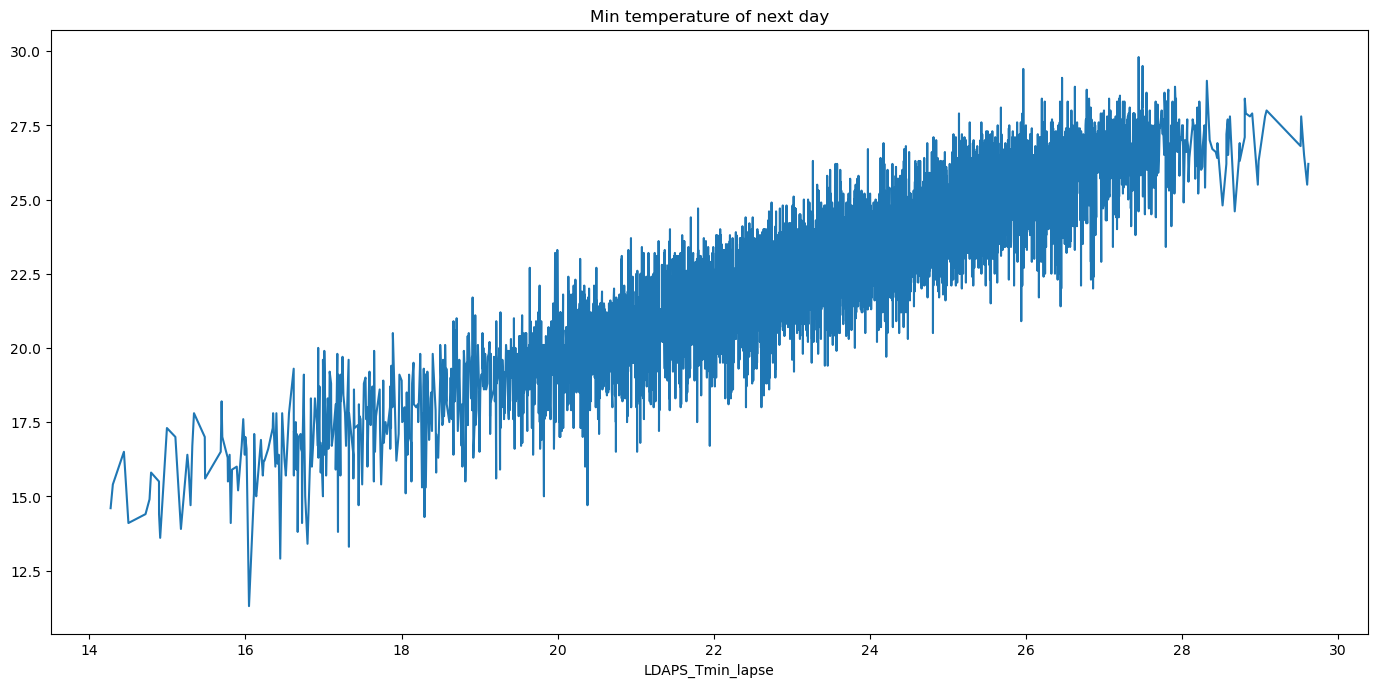

In [49]:
# Comparing the min temperature of next day with longitude 

byLDAPS_Tmin_lapse = df.groupby("LDAPS_Tmin_lapse").mean()
plt.figure(figsize=(17,8),dpi=100)
byLDAPS_Tmin_lapse['Next_Tmin'].plot()
plt.title('Min temperature of next day')

This graph of LDAPS_Tmin_lapse v/s min temperature of next day is showing a linear relationship

With the increase in the value of LDAPS_Tmin_lapse, the value of next day min temperature increases. They are highly correlated

# Multi - Variant Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'station'),
  Text(0, 1.5, 'Present_Tmax'),
  Text(0, 2.5, 'Present_Tmin'),
  Text(0, 3.5, 'LDAPS_RHmin'),
  Text(0, 4.5, 'LDAPS_RHmax'),
  Text(0, 5.5, 'LDAPS_Tmax_lapse'),
  Text(0, 6.5, 'LDAPS_Tmin_lapse'),
  Text(0, 7.5, 'LDAPS_WS'),
  Text(0, 8.5, 'LDAPS_LH'),
  Text(0, 9.5, 'LDAPS_CC1'),
  Text(0, 10.5, 'LDAPS_CC2'),
  Text(0, 11.5, 'LDAPS_CC3'),
  Text(0, 12.5, 'LDAPS_CC4'),
  Text(0, 13.5, 'LDAPS_PPT1'),
  Text(0, 14.5, 'LDAPS_PPT2'),
  Text(0, 15.5, 'LDAPS_PPT3'),
  Text(0, 16.5, 'LDAPS_PPT4'),
  Text(0, 17.5, 'lat'),
  Text(0, 18.5, 'lon'),
  Text(0, 19.5, 'DEM'),
  Text(0, 20.5, 'Slope'),
  Text(0, 21.5, 'Solar radiation'),
  Text(0, 22.5, 'Next_Tmax'),
  Text(0, 23.5, 'Next_Tmin'),
  Text(0, 24.5, 'Month'),
  Text(0, 25.5, 'Day'),
  Text(0, 26.5, 'Year')])

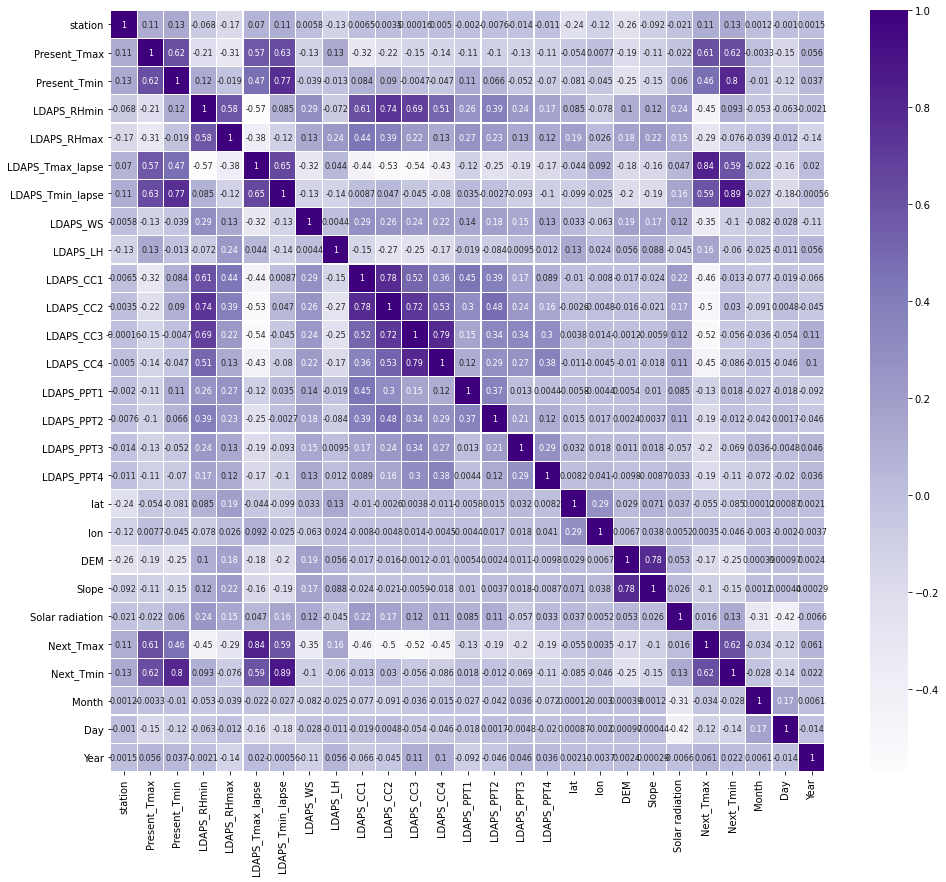

In [50]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

From this heatmap we have got the correlation values 

We can see that the column "LDAPS_Tmax_lapse" and "Present_Tmax" has high positive correlation with the target Next_Tmax

Likewise the column "LDAPS_Tmin_lapse"  and "Present_Tmin" has high positive correlation with the target Next_Tmin

So these 4 features are very important factor in predicting the next day minimum and maximum temperature values.

The columns with good positive correlation values with Next_Tmax are Present_Tmin, LDAPS_Tmin_lapse and Next_Tmin

The columns with good positive correlation values with Next_Tin are Present_Tmax, LDAPS_Tmax_lapse and Next_Tmax

The columns have least correlation with both of the target labels



In [51]:
cor = df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001211,-0.000996,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.003266,-0.154366,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.010210,-0.115693,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.053499,-0.063464,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.039424,-0.012226,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.022279,-0.161320,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.027050,-0.176772,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.082267,-0.028312,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.024944,-0.010504,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.076819,-0.018974,-0.066233


 This is the correlation values for our dataset which we saw visually using the heatmap
    
 We can see that the column "LDAPS_Tmax_lapse" and "LDAPS_Tmin_lapse" have high positive correlation with our target variables i.e., Next_Tmax and Next_Tmin

In [52]:
# Representing which columns have positive and negative correlations with the target column

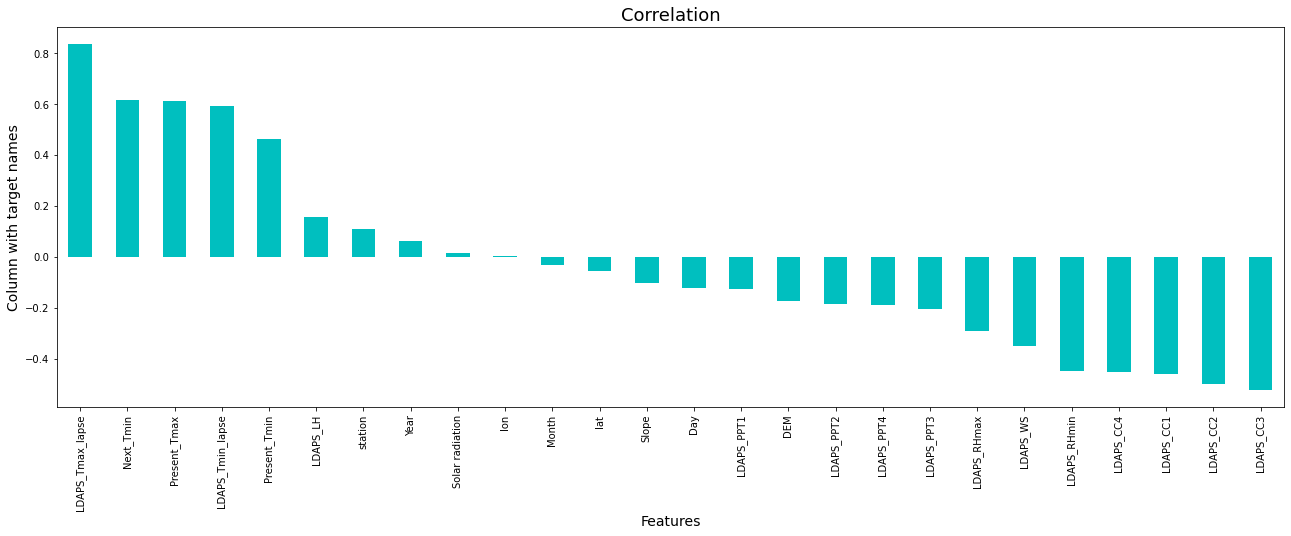

In [53]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(["Next_Tmax"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Shows positively and negatively correlated features with the target label Next_Tmax

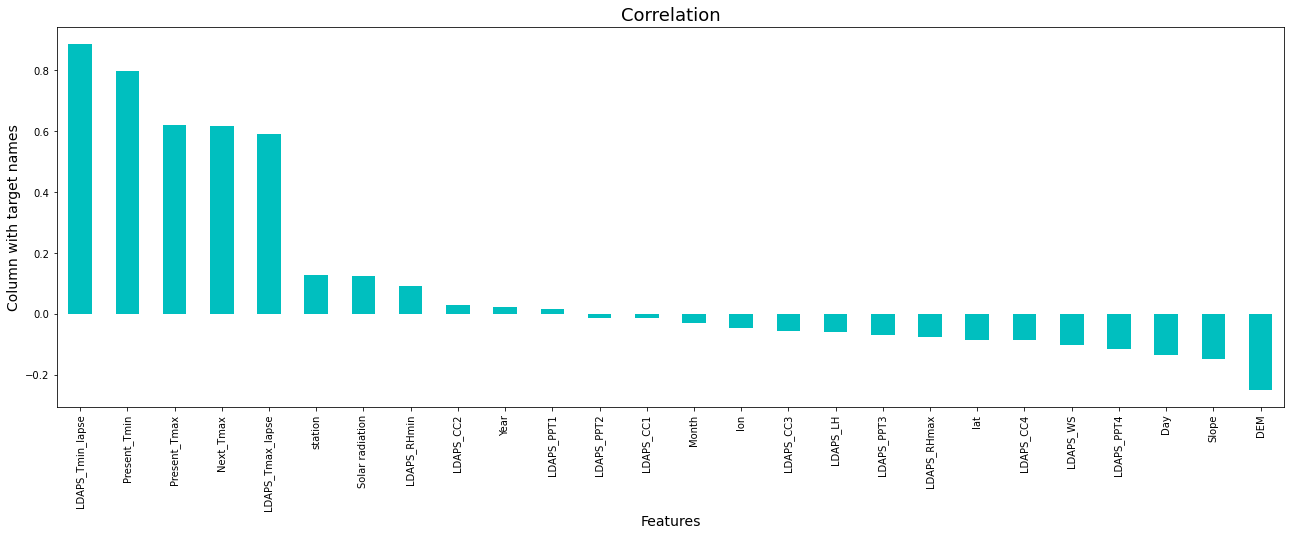

In [54]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(["Next_Tmin"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Shows positively and negatively correlated features with the target label Next_Tmin



We have detected the presence of outliers in our dataset by the boxplot during the uni - variant analyse and also skewness was evident from the distribution plot

Let's check the amount of skewness present

In [55]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Month              -0.703092
Day                 0.245563
Year                0.013575
dtype: float64

In [56]:
#  We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of many columns way outside the above mentioned range and they need to be treated. 
# Skewness is present highly.

# Handling skewness

In [57]:
skewness, skew_name = [], []
for i in df:
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness']<-0.5],skew_df[skew_df['Skewness']>0.5] 

(                  Skewness
 Solar radiation      -0.52
 LDAPS_Tmin_lapse     -0.57
 Month                -0.70
 LDAPS_RHmax          -0.85,
             Skewness
 LDAPS_PPT4      6.68
 LDAPS_PPT3      6.36
 LDAPS_PPT2      5.71
 LDAPS_PPT1      5.31
 DEM             1.72
 Slope           1.56
 LDAPS_WS        1.55
 LDAPS_LH        0.66
 LDAPS_CC4       0.66
 LDAPS_CC3       0.64)

# Outlier removal

In [58]:
#outliers removal
from scipy import stats
from scipy.stats import zscore

df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
df_new = df.apply(zscore) # Normalization
print(df_new.describe())

            station  Present_Tmax  Present_Tmin   LDAPS_RHmin   LDAPS_RHmax  \
count  7.588000e+03  7.588000e+03  7.588000e+03  7.588000e+03  7.588000e+03   
mean  -3.886073e-17  6.087791e-16  5.018536e-16 -1.854664e-16 -1.288783e-15   
std    1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00   
min   -1.664607e+00 -3.285370e+00 -4.955097e+00 -2.525046e+00 -4.087320e+00   
25%   -8.332802e-01 -6.566334e-01 -6.647206e-01 -7.360197e-01 -5.774566e-01   
50%   -1.953785e-03  5.110336e-02  8.505394e-02 -1.163556e-01  1.977084e-01   
75%    8.293726e-01  7.588401e-01  6.682119e-01  7.104074e-01  7.475921e-01   
max    1.660699e+00  2.646138e+00  2.792573e+00  2.857987e+00  1.616802e+00   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse      LDAPS_WS      LDAPS_LH  \
count      7.588000e+03      7.588000e+03  7.588000e+03  7.588000e+03   
mean       1.596128e-16      4.772730e-16  2.958083e-17  9.580575e-17   
std        1.000066e+00      1.000066e+00  1.000066e+00  1.000066e+00

Standard deviation is reduced to 1, which implies that the data is normally spread

In [59]:
skew_df[skew_df['Skewness']<-0.5],skew_df[skew_df['Skewness']>0.5]

(                  Skewness
 Solar radiation      -0.52
 LDAPS_Tmin_lapse     -0.57
 Month                -0.70
 LDAPS_RHmax          -0.85,
             Skewness
 LDAPS_PPT4      6.68
 LDAPS_PPT3      6.36
 LDAPS_PPT2      5.71
 LDAPS_PPT1      5.31
 DEM             1.72
 Slope           1.56
 LDAPS_WS        1.55
 LDAPS_LH        0.66
 LDAPS_CC4       0.66
 LDAPS_CC3       0.64)

In [60]:
df1=np.sqrt(df)

In [61]:
df1.skew()

station            -0.483986
Present_Tmax       -0.374583
Present_Tmin       -0.527288
LDAPS_RHmin         0.018839
LDAPS_RHmax        -0.952601
LDAPS_Tmax_lapse   -0.372797
LDAPS_Tmin_lapse   -0.751497
LDAPS_WS            1.035809
LDAPS_LH            0.043247
LDAPS_CC1          -0.246853
LDAPS_CC2          -0.288132
LDAPS_CC3          -0.110855
LDAPS_CC4          -0.027281
LDAPS_PPT1          2.732743
LDAPS_PPT2          3.105387
LDAPS_PPT3          3.644210
LDAPS_PPT4          3.902692
lat                 0.084246
lon                -0.289652
DEM                 1.151683
Slope               0.869483
Solar radiation    -0.572007
Next_Tmax          -0.467777
Next_Tmin          -0.577792
Month              -1.521926
Day                 0.058702
Year                0.013204
dtype: float64

Skewness and outliers are handled

In [62]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for x in df1.columns.drop('Next_Tmax','Next_Tmin'):
    if abs(df1.loc[:,x].skew())>0.55:
        df1.loc[:,x]=pt.fit_transform(df1.loc[:,x].values.reshape(-1,1))

In [63]:
np.any(np.isnan(df1))

True

In [64]:
# Let's treat the Nan values 

In [65]:
df1=df1.replace(np.nan, 0)

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


Splitting the dataset into features and labels

In [67]:
X = df1.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [68]:
df2=pd.DataFrame({})
df2['Next_Tmin']=df1['Next_Tmin']
df2['Next_Tmax']=df1['Next_Tmax']

In [69]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Day,Year
0,1.000000,5.357238,4.626013,7.632541,0.271095,5.298500,-0.311423,0.097476,8.333775,0.483681,...,-0.608749,-0.538071,6.132259,11.269028,1.834623,1.252703,1.852808,-0.572133,5.477226,44.866469
1,1.414214,5.648008,4.647580,7.229343,0.184486,5.463578,0.143301,-0.618401,7.206764,0.474877,...,-0.608749,-0.538071,6.132259,11.270847,0.053338,-0.305586,1.398711,-0.572133,5.477226,44.866469
2,1.732051,5.621388,4.827007,6.977856,-0.769088,5.485553,0.392421,-0.308857,4.535752,0.457541,...,-0.608749,-0.538071,6.130057,11.272001,-0.368368,-0.895536,1.378445,-0.572133,5.477226,44.866469
3,2.000000,5.656854,4.837355,7.631500,1.310013,5.450195,-0.174102,-0.649473,8.107228,0.465158,...,-0.608749,-0.538071,6.135552,11.270404,0.082359,1.170686,1.355339,-0.572133,5.477226,44.866469
4,2.236068,5.603570,4.679744,7.494938,0.110037,5.395733,-0.103839,-0.586773,10.390647,0.389110,...,-0.608749,-0.538071,6.127863,11.275416,-0.294127,-0.321172,1.364398,-0.572133,5.477226,44.866469


 The data is normalized and we have applied power transform on our dataset and also treated the Nan values introduced during the process

In [70]:
y=df2

In [71]:
y

,Next_Tmin,Next_Tmax
0,-0.736424,5.394442
1,-0.231526,5.522681
2,0.351853,5.576737
3,0.526186,5.630275
4,-0.231526,5.585696
...,...,...
7745,-1.924505,5.253570
7746,-2.103747,5.291503
7747,-1.801100,5.319774
7748,-1.577548,5.347897


# Machine Learning Models

# Hyper-parameter tuning

In [73]:
# Train test split on the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [75]:
def model(mod):
    md=mod()
    md.fit(X_train,y_train)
    predict=md.predict(X_test)
    r2score=r2_score(y_test,predict)
    print("model: {}".format(mod))
    print("r2score is {}".format(r2score))
    print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
    print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

In [76]:
model(LinearRegression)

model: <class 'sklearn.linear_model._base.LinearRegression'>
r2score is 0.7969513162963986
MAE score is 0.21398676540963357
RMSE score is 0.30760877928136426


The performance of Linear Regressor model is 79.69% with MAE and RMSE score of 0.21 and 0.307 respectively

In [77]:
model(KNeighborsRegressor)

model: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
r2score is 0.8001762655059803
MAE score is 0.21420841109044692
RMSE score is 0.3167346878307809


The performance of KNeighborsRegressor model is 80% with MAE and RMSE score of 0.21 and 0.316 respectively

In [78]:
model(RandomForestRegressor)

model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2score is 0.8896062820363599
MAE score is 0.15474431100075783
RMSE score is 0.2248947183458547


The performance of RandomForestRegressor model is 88.96% with MAE and RMSE score of 0.15 and 0.22 respectively

In [79]:
model(DecisionTreeRegressor)

model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
r2score is 0.7501618498189049
MAE score is 0.22100796271038822
RMSE score is 0.334836153646458


The performance of DecisionTreeRegressor model is 75% with MAE and RMSE score of 0.22 and 0.33 respectively

# Our best model is RandomForest Regressor because of its high performance of 88.96% with minimal MAE and RMSE of 0.15 and 0.22 respectively compared to all other models

# Hyper parameter tuning on our best model

In [80]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestRegressor(),paramgrid)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [82]:
grid.best_params_

{'max_depth': 19, 'n_estimators': 181}

In [83]:
predict=grid.predict(X_test)
r2score=r2_score(y_test,predict)
print("r2score is {}".format(r2score))
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

r2score is 0.8908863072182067
MAE score is 0.1537095875626212
RMSE score is 0.22357422424823023


With hyper paramter tuning we have increases the performance in some amount

# Saving the model

In [96]:
# Serializing or saving the model
# Importing the necessary library for saving the model

import joblib
joblib.dump(model(RandomForestRegressor),"FinalModel.pkl")

model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2score is 0.88926992005069
MAE score is 0.15471857761108457
RMSE score is 0.22554572573992526


['FinalModel.pkl']

Model is saved